In [1]:
# Calisma icin geerekli kutuphaneler eklendi.

# Temel cozumler.
import itertools # Iterasyon ve kombinasyonlar icin kullanildi.
import time  # Zaman olcumu icin kullanildi.
import os
from collections import Counter
from datetime import datetime

# Veri isleme ve gorsellestirme.
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Model ve Performans metrikleri cikarimi.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # type: ignore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize # type: ignore
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, f1_score, precision_score, recall_score # type: ignore

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

# Sinir Aglari cozumu.
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout # type: ignore
from keras.initializers import RandomNormal # type: ignore
from keras.activations import relu, softmax, sigmoid, tanh # type: ignore

# RBF ve MLP yaklasimlari.
from sklearn.cluster import KMeans # type: ignore
from scipy.spatial.distance import cdist # type: ignore
from sklearn.neural_network import MLPClassifier # type: ignore

# Veriseti ve Transformer mimarisi.
from torchvision import datasets, transforms # type: ignore
from torchvision.datasets import GTSRB # type: ignore
from torchvision.transforms import ToTensor # type: ignore

In [2]:
# Tum goruntulerin ayni boyutta oldugunu dogrulamak icin; yeniden boyutlandirma uyguladik.
transform = transforms.Compose([
    transforms.Resize((32, 32)), # Goruntuleri temel ortak olcege getirdik. [ 32x32 boyutuna. ]
  # transforms.Resize((64, 64)), # Farkli boyutlardaki durumlar denendi. Fakat sonuc degismedi.
    transforms.ToTensor()
])

# Veri setini indirme ve verisetini donusturme isleminde bulunduk.
train_data = GTSRB(root=".", split="train", transform=transform, download=True)
X = np.array([img[0].numpy().flatten() for img in train_data])
y = np.array([img[1] for img in train_data])

# Veriyi %80 egitim ve %20 test olarak ayirdik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()  # Alternatif: MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Bos veya NULL deger durumunu kontrol ettik.
missing_values_train = pd.DataFrame(X_train_scaled).isnull().sum().sum()
missing_values_test = pd.DataFrame(X_test_scaled).isnull().sum().sum()

print(f"Egitim verisinde toplam {missing_values_train} adet bos/null deger bulunmaktadir.")
print(f"Test verisinde toplam {missing_values_test} adet bos/null deger bulunmaktadir.")

Egitim verisinde toplam 0 adet bos/null deger bulunmaktadir.
Test verisinde toplam 0 adet bos/null deger bulunmaktadir.


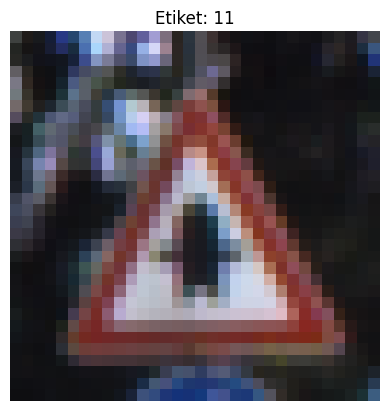

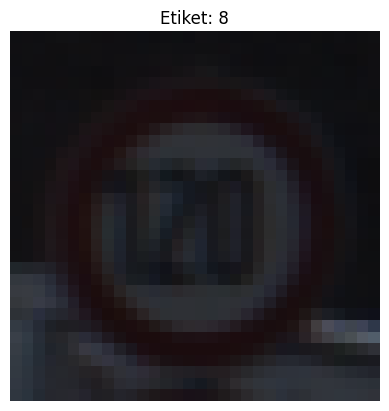

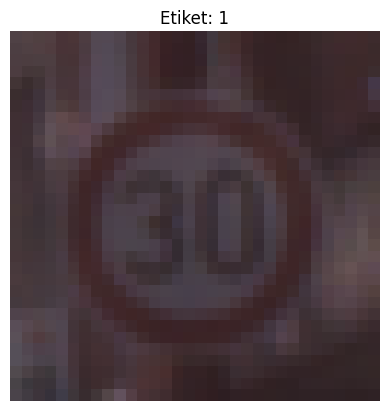

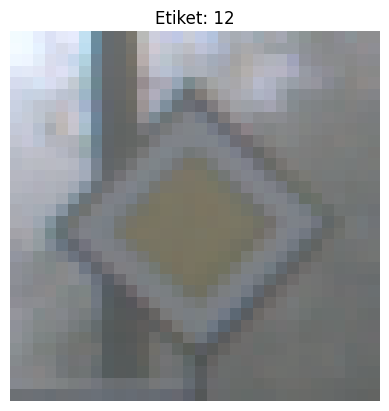

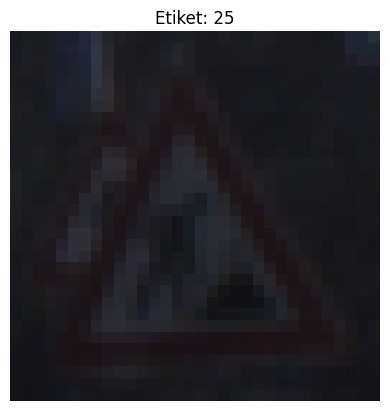

In [4]:
import matplotlib.pyplot as plt

# Test goruntulerinden birkacini gorsellestirdik.
for i in range(5):  # Ilk 5 goruntuyu sirali olarak goruntuledik.
    plt.imshow(X_test[i].reshape(3, 32, 32).transpose(1, 2, 0))  # (3, 32, 32) -> (32, 32, 3)
  # plt.imshow(X_test[i].reshape(3, 64, 64).transpose(1, 2, 0))  # (3, 64, 64) -> (64, 64, 3)
    plt.title(f"Etiket: {y_test[i]}")
    plt.axis("off")
    plt.show()

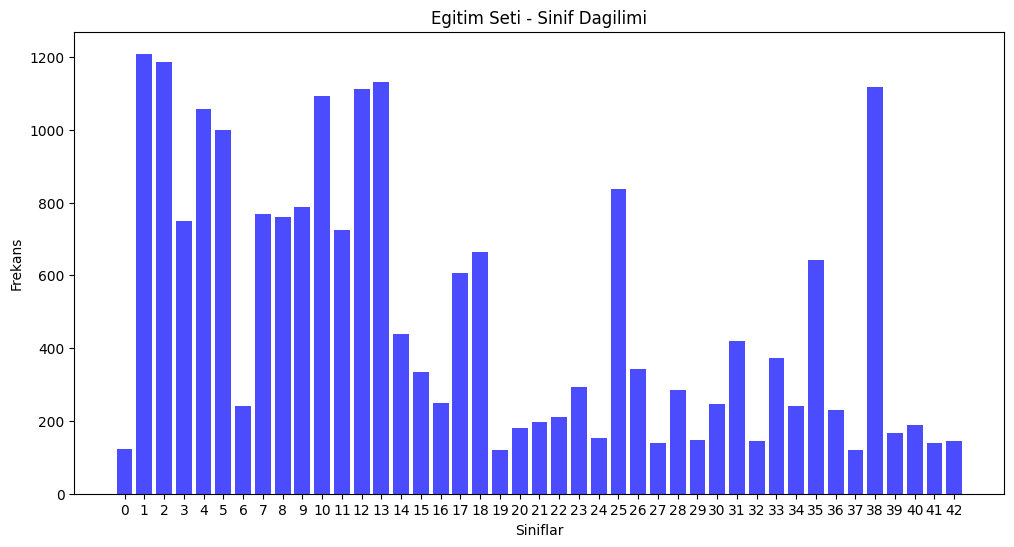

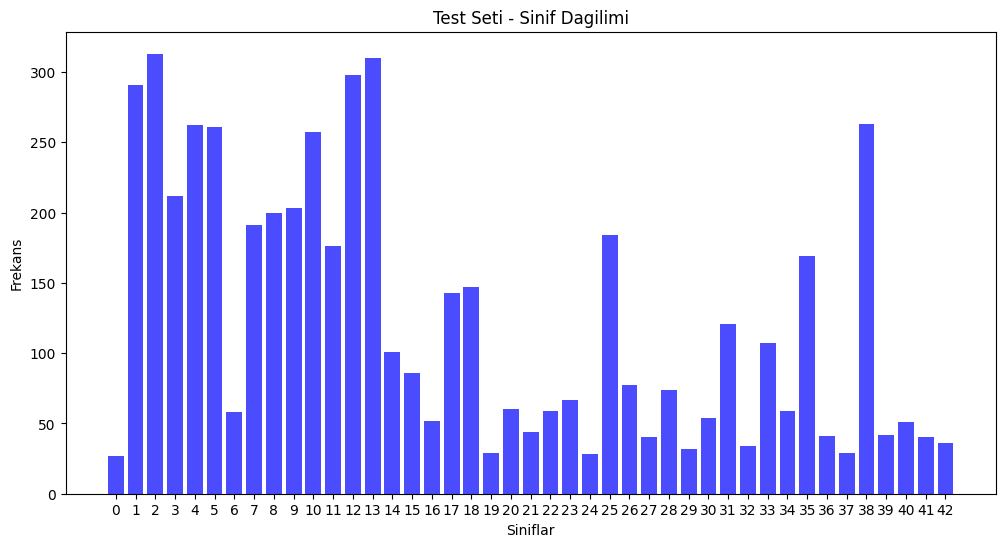

In [5]:
def plot_class_distribution(y_data, title):
    class_counts = Counter(y_data)
    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='blue', alpha=0.7)
    plt.xlabel('Siniflar')
    plt.ylabel('Frekans')
    plt.title(title)
    plt.xticks(range(len(class_counts)))
    plt.show()

plot_class_distribution(y_train, "Egitim Seti - Sinif Dagilimi")
plot_class_distribution(y_test, "Test Seti - Sinif Dagilimi")

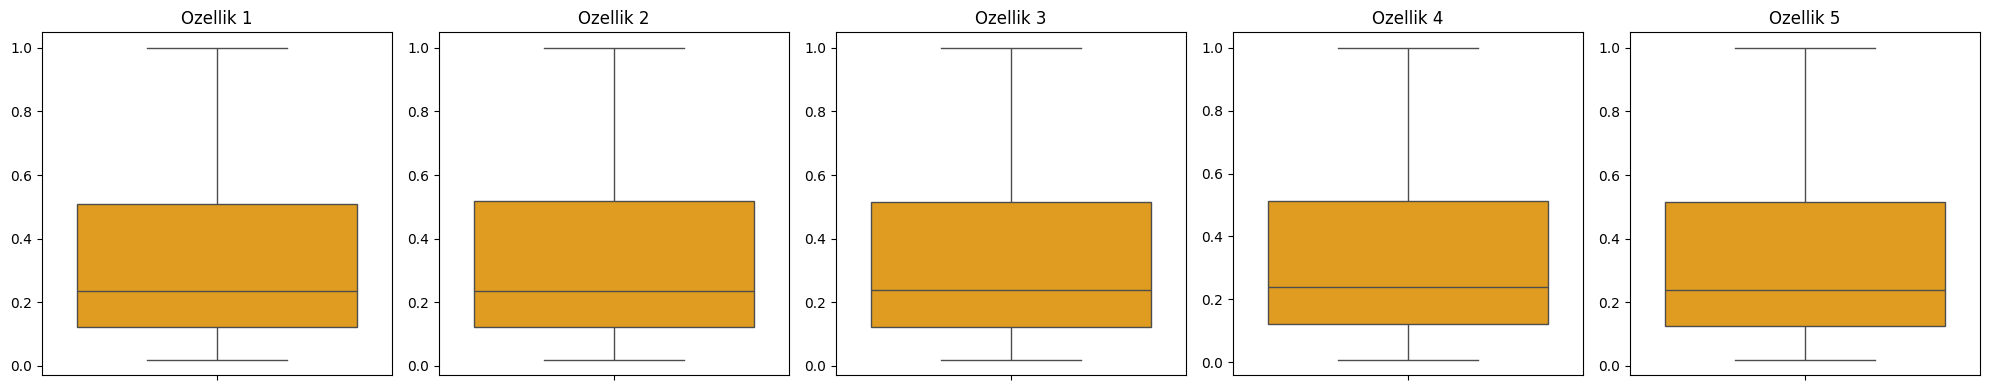

In [6]:
# Boxplot ile ozellik dagilimi ve aykiri degerleri inceledik.
def plot_boxplots(data, num_features=5):
    plt.figure(figsize=(20, 4))
    for i in range(num_features):
        plt.subplot(1, 5, i + 1)
        sns.boxplot(data[:, i], color='orange')
        plt.title(f'Ozellik {i+1}')
    plt.tight_layout()
    plt.show()

# Ilk birkac ozelligi Boxplot ile incelemek gorsellestirdik.
plot_boxplots(X_train, num_features=5)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam; total time=  23.6s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam; total time=  16.8s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam; total time=  19.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=100, solver=sgd; total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=100, solver=sgd; total time=  28.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=100, solver=sgd; total time=  28.2s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam; total time=  22.9s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam; total time=  16.2s
[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam; total time=  19.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd; total time=  42.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd; total time=  42.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd; total time=  42.4s
[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam; total time=  20.0s
[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam; total time=  39.9s
[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam; total time=  17.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=100, solver=sgd; total time=  44.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=100, solver=sgd; total time=  43.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=100, solver=sgd; total time=  44.0s
[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam; total time=  20.1s
[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam; total time=  40.3s
[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam; total time=  16.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=150, solver=sgd; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=150, solver=sgd; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(128, 128), max_iter=150, solver=sgd; total time= 1.1min
[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=100, solver=adam; total time=  16.2s
[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=100, solver=adam; total time=  13.0s
[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=100, solver=adam; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=100, solver=sgd; total time=  30.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=100, solver=sgd; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=100, solver=sgd; total time=  30.7s
[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=150, solver=adam; total time=  16.2s
[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=150, solver=adam; total time=  13.0s
[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=150, solver=adam; total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=150, solver=sgd; total time=  46.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=150, solver=sgd; total time=  45.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(64, 128), max_iter=150, solver=sgd; total time=  46.0s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam; total time=  12.7s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam; total time=  13.3s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=100, solver=adam; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=100, solver=sgd; total time=  26.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=100, solver=sgd; total time=  27.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=100, solver=sgd; total time=  27.2s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam; total time=  13.0s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam; total time=  13.2s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=150, solver=adam; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd; total time=  40.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd; total time=  39.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 64), max_iter=150, solver=sgd; total time=  39.0s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam; total time=  26.9s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam; total time=  16.0s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=100, solver=adam; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=100, solver=sgd; total time=  40.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=100, solver=sgd; total time=  40.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=100, solver=sgd; total time=  39.6s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam; total time=  26.3s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam; total time=  16.2s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=150, solver=adam; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=150, solver=sgd; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=150, solver=sgd; total time=  59.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(128, 128), max_iter=150, solver=sgd; total time=  59.9s
[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=100, solver=adam; total time=  11.2s
[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=100, solver=adam; total time=  13.3s
[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=100, solver=adam; total time=  16.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=100, solver=sgd; total time=  28.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=100, solver=sgd; total time=  28.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=100, solver=sgd; total time=  28.2s
[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=150, solver=adam; total time=  11.5s
[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=150, solver=adam; total time=  13.5s
[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=150, solver=adam; total time=  16.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=150, solver=sgd; total time=  41.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=150, solver=sgd; total time=  41.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(64, 128), max_iter=150, solver=sgd; total time=  41.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


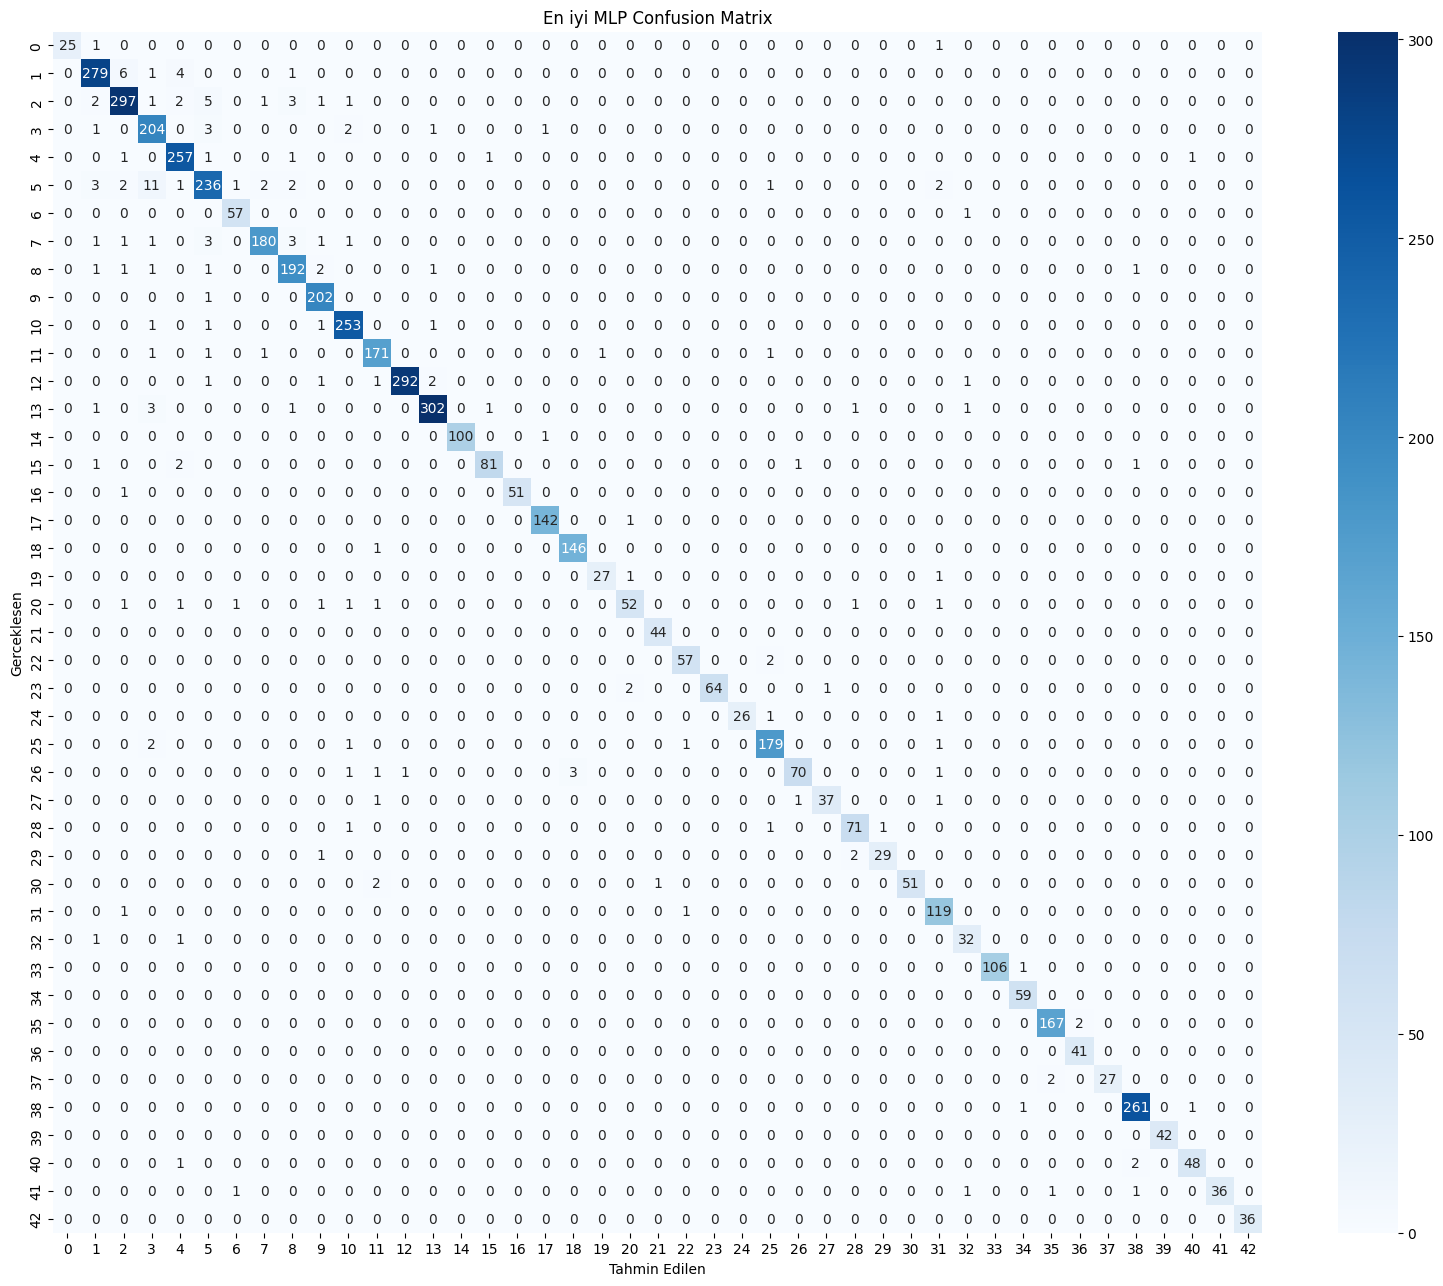

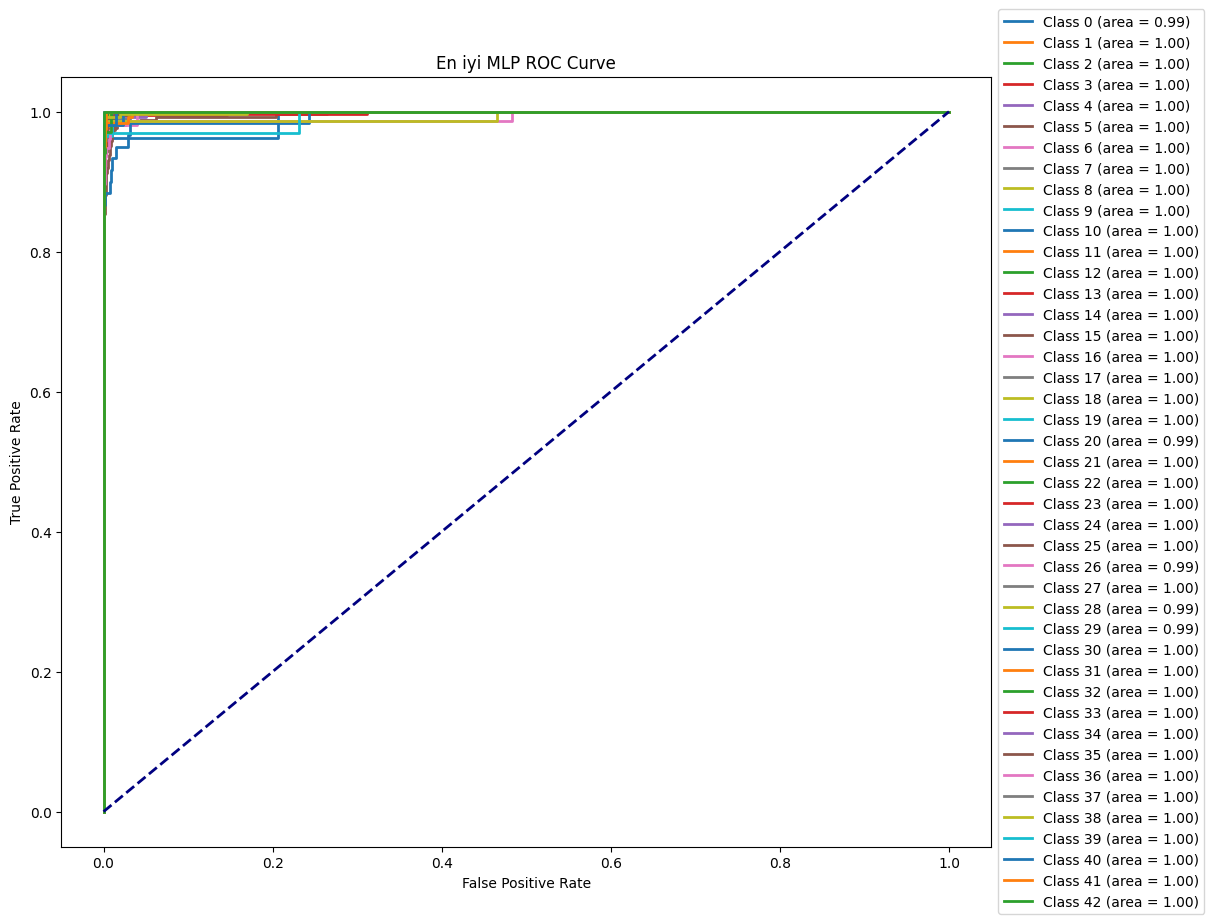

En iyi MLP Parametreleri: {'activation': 'tanh', 'hidden_layer_sizes': (128, 128), 'max_iter': 150, 'solver': 'sgd'}
MLP Accuracy: 0.9662162162162162
MLP F1 Score: 0.9661706072741938
MLP Precision: 0.9665873103994969
MLP Recall: 0.9662162162162162
RBF Model Denemesi: 64-64, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-64, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-64, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-64, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-64, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-64, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-64, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-64, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 64-128, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-64, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: relu, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: relu, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: tanh, Optimizer: adam, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RBF Model Denemesi: 128-128, Aktivasyon: tanh, Optimizer: rmsprop, Batch Size: 32, Epochs: 150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


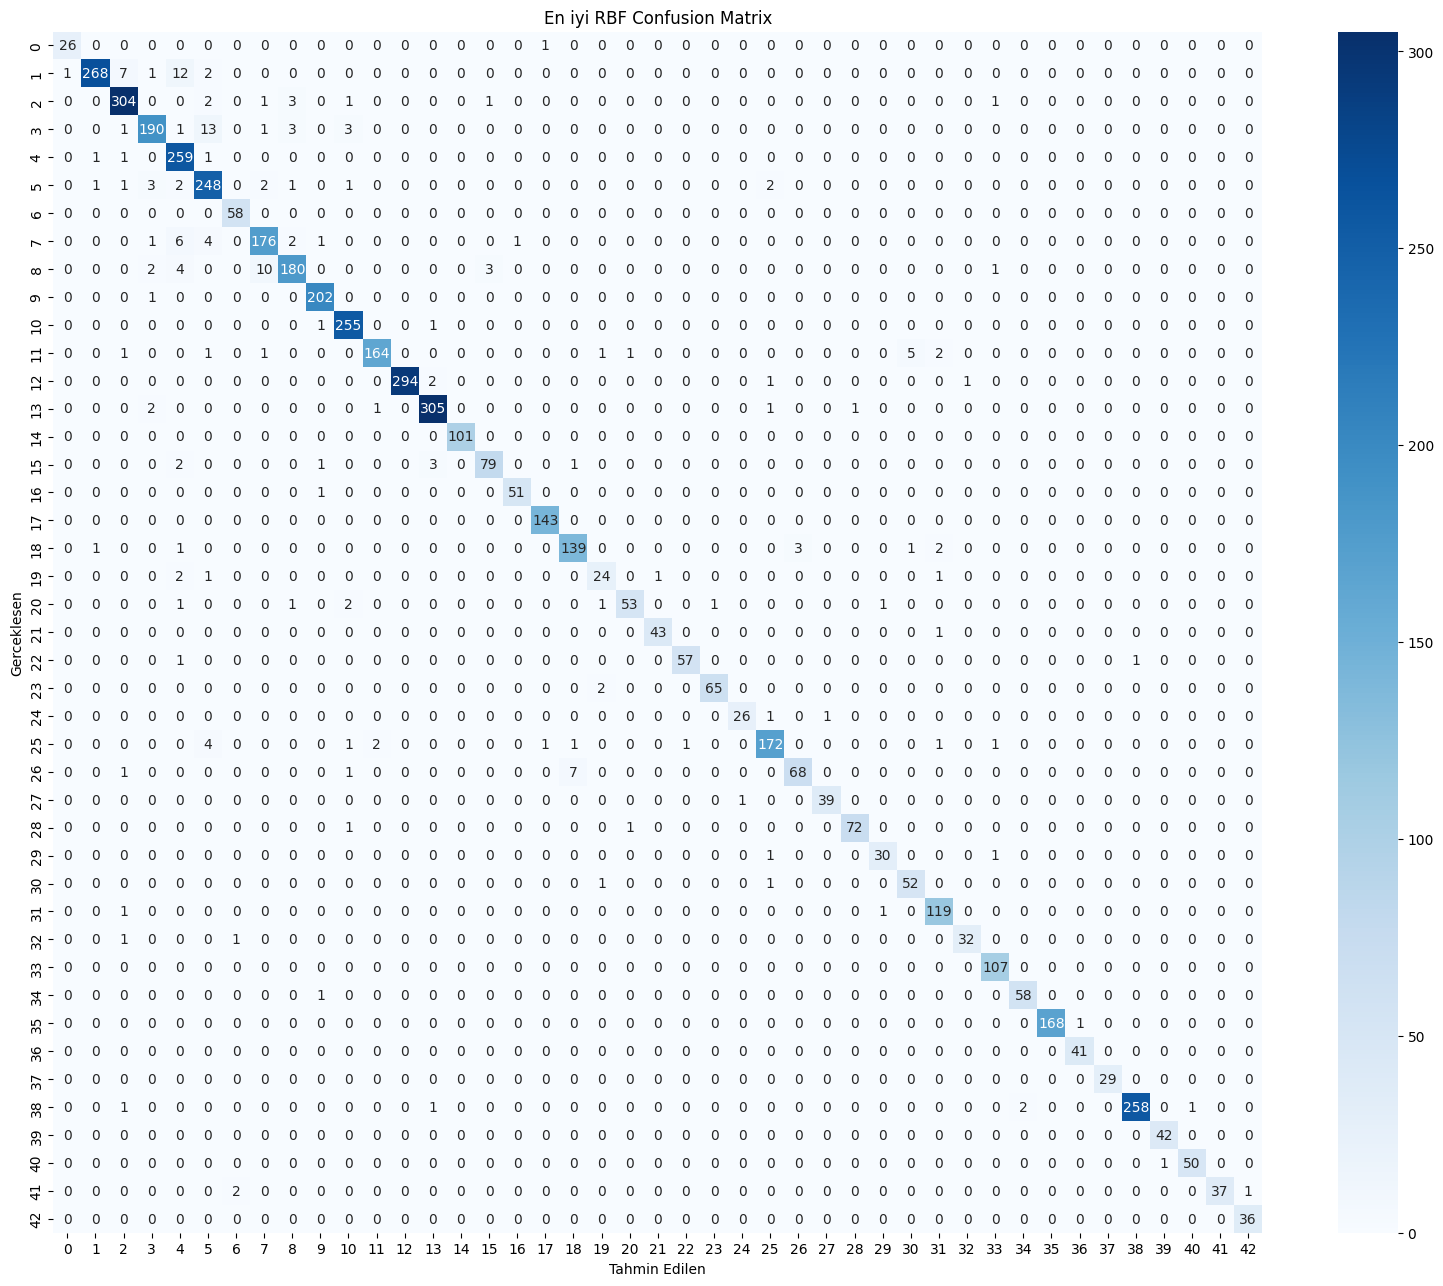

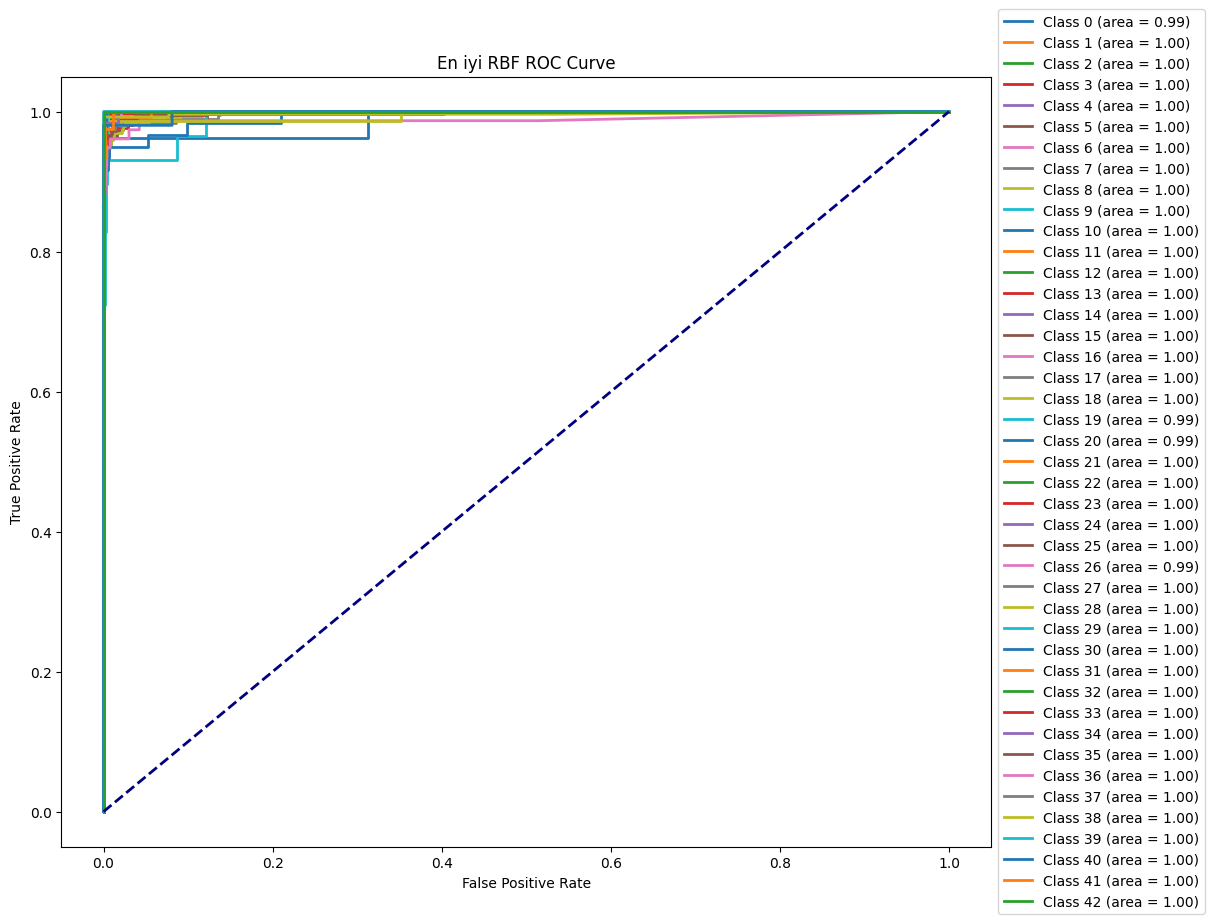

En iyi RBF Parametreleri: {'neurons_layer1': 64, 'neurons_layer2': 128, 'activation': 'relu', 'optimizer': 'adam', 'batch_size': 32, 'epochs': 150}
RBF Accuracy: 0.960960960960961
RBF F1 Score: 0.9609163913276034
RBF Precision: 0.9617495516689656
RBF Recall: 0.960960960960961
Toplam Deneme Suresi: 6252.77 saniye

Model: MLP
Parametreler: {'activation': 'tanh', 'hidden_layer_sizes': (128, 128), 'max_iter': 150, 'solver': 'sgd'}
Accuracy: 0.9662162162162162
F1 Score: 0.9661706072741938
Precision: 0.9665873103994969
Recall: 0.9662162162162162

Model: RBF
Parametreler: {'neurons_layer1': 64, 'neurons_layer2': 64, 'activation': 'relu', 'optimizer': 'adam', 'batch_size': 32, 'epochs': 100}
Accuracy: 0.9414414414414415
F1 Score: 0.9423990745715028
Precision: 0.9463131736623069
Recall: 0.9414414414414415

Model: RBF
Parametreler: {'neurons_layer1': 64, 'neurons_layer2': 64, 'activation': 'relu', 'optimizer': 'adam', 'batch_size': 32, 'epochs': 150}
Accuracy: 0.9519519519519519
F1 Score: 0.9517

In [7]:
# Calismada zamanlari takip edecek; zaman formatlama fonksiyonu.
def format_time(epoch_time):
    return datetime.fromtimestamp(epoch_time).strftime("%H:%M:%S.%f")[:-3]

# Confusion Matrix ve ROC Curve cizim fonksiyonlari.
def plot_confusion_matrix(y_true, y_pred, title, figsize=(19.5, 15.6)):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerceklesen')
    plt.show()

def plot_roc_curve(y_true, y_score, n_classes, title):
    y_true_binarized = label_binarize(y_true, classes=range(n_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(12, 10))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Tüm denemeler icin sonuclari saklayacak liste.
detailed_results = []

# Tum test sureleri.
total_start_time = time.time()

## MLP modeli icin; dinamik hiperparametre test ve optimizasyonu.
param_grid_mlp = {
    #'hidden_layer_sizes': [(64, 64)],
    'hidden_layer_sizes': [(64, 64), (128, 128), (64, 128)],
    #'activation': ['relu'],
    'activation': ['relu', 'tanh'],
    #'solver': ['adam'],
    'solver': ['adam', 'sgd'],
    #'max_iter': [100],
    'max_iter': [100, 150],
}

mlp = MLPClassifier(random_state=42)
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, scoring='accuracy', cv=3, verbose=2)
grid_search_mlp.fit(X_train_scaled, y_train)

best_mlp_params = grid_search_mlp.best_params_
y_pred_mlp = grid_search_mlp.best_estimator_.predict(X_test_scaled)
y_score_mlp = grid_search_mlp.best_estimator_.predict_proba(X_test_scaled)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# MLP sonuclarini kaydetme.
detailed_results.append({
    'model': 'MLP',
    'params': best_mlp_params,
    'accuracy': acc_mlp,
    'f1_score': f1_mlp,
    'precision': precision_mlp,
    'recall': recall_mlp
})

# En iyi MLP Confusion Matrix ve ROC Curve cizim fonksiyonlari.
plot_confusion_matrix(y_test, y_pred_mlp, "En iyi MLP Confusion Matrix")
plot_roc_curve(y_test, y_score_mlp, len(np.unique(y_test)), "En iyi MLP ROC Curve")

print(f"En iyi MLP Parametreleri: {best_mlp_params}")
print(f"MLP Accuracy: {acc_mlp}")
print(f"MLP F1 Score: {f1_mlp}")
print(f"MLP Precision: {precision_mlp}")
print(f"MLP Recall: {recall_mlp}")

# RBF modeli icin; dinamik hiperparametre test ve optimizasyonu.
param_dist_rbf = {
    #'neurons_layer1': [64],
    'neurons_layer1': [64, 128],
    #'neurons_layer2': [64],
    'neurons_layer2': [64, 128],
    #'activation': ['relu'],
    'activation': ['relu', 'tanh'],
    #'optimizer': ['adam'],
    'optimizer': ['adam', 'rmsprop'],
    #'batch_size': [32, 64],
    'batch_size': [32],
    #'epochs': [100]
    'epochs': [100, 150]
}

best_rbf_params = None
best_rbf_acc = float('-inf')
best_rbf_model = None

for neurons_layer1 in param_dist_rbf['neurons_layer1']:
    for neurons_layer2 in param_dist_rbf['neurons_layer2']:
        for activation in param_dist_rbf['activation']:
            for optimizer in param_dist_rbf['optimizer']:
                for batch_size in param_dist_rbf['batch_size']:
                    for epochs in param_dist_rbf['epochs']:
                        print(f"RBF Model Denemesi: {neurons_layer1}-{neurons_layer2}, Aktivasyon: {activation}, Optimizer: {optimizer}, Batch Size: {batch_size}, Epochs: {epochs}")

                        try:
                            model = Sequential([
                                Dense(neurons_layer1, input_dim=X_train.shape[1], activation=activation),
                                Dropout(0.2),
                                Dense(neurons_layer2, activation=activation),
                                Dropout(0.2),
                                Dense(len(np.unique(y_train)), activation='softmax')
                            ])
                            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                            model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                            # Test performansı arastirmasi.
                            y_pred_rbf = np.argmax(model.predict(X_test_scaled), axis=1)
                            y_score_rbf = model.predict(X_test_scaled)
                            acc_rbf = accuracy_score(y_test, y_pred_rbf)
                            f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')
                            precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
                            recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')

                            # RBF sonuclarini kaydetme.
                            detailed_results.append({
                                'model': 'RBF',
                                'params': {
                                    'neurons_layer1': neurons_layer1,
                                    'neurons_layer2': neurons_layer2,
                                    'activation': activation,
                                    'optimizer': optimizer,
                                    'batch_size': batch_size,
                                    'epochs': epochs
                                },
                                'accuracy': acc_rbf,
                                'f1_score': f1_rbf,
                                'precision': precision_rbf,
                                'recall': recall_rbf
                            })

                            if acc_rbf > best_rbf_acc:
                                best_rbf_acc = acc_rbf
                                best_rbf_params = {
                                    'neurons_layer1': neurons_layer1,
                                    'neurons_layer2': neurons_layer2,
                                    'activation': activation,
                                    'optimizer': optimizer,
                                    'batch_size': batch_size,
                                    'epochs': epochs
                                }
                                best_rbf_model = model

                        except Exception as e:
                            print(f"RBF modelinde hata oluştu: {e}")

# En iyi RBF modelinin degerelendirilmesi.
if best_rbf_model is not None:
    y_pred_rbf = np.argmax(best_rbf_model.predict(X_test_scaled), axis=1)
    y_score_rbf = best_rbf_model.predict(X_test_scaled)
    acc_rbf = accuracy_score(y_test, y_pred_rbf)
    f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')
    precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
    recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')

    # Confusion Matrix ve ROC Curve cizim fonksiyonlari.
    plot_confusion_matrix(y_test, y_pred_rbf, "En iyi RBF Confusion Matrix")
    plot_roc_curve(y_test, y_score_rbf, len(np.unique(y_test)), "En iyi RBF ROC Curve")

    print(f"En iyi RBF Parametreleri: {best_rbf_params}")
    print(f"RBF Accuracy: {acc_rbf}")
    print(f"RBF F1 Score: {f1_rbf}")
    print(f"RBF Precision: {precision_rbf}")
    print(f"RBF Recall: {recall_rbf}")

# Tum denemelerin sureleri.
total_end_time = time.time()
total_elapsed_time = total_end_time - total_start_time
print(f"Toplam Deneme Suresi: {total_elapsed_time:.2f} saniye")

# Tüm denemelerin sonuçlarını yazdırma.
for result in detailed_results:
    print("\nModel:", result['model'])
    print("Parametreler:", result['params'])
    print("Accuracy:", result['accuracy'])
    print("F1 Score:", result['f1_score'])
    print("Precision:", result['precision'])
    print("Recall:", result['recall'])